# Project 4: Đồ án Linear Regression
#### Họ và tên: Trần Anh khoa
#### Lớp: 23CTT2
#### Mã số sinh viên: 23120135

## Yêu cầu a
Cho file "wine.csv", hãy sử dụng 11 đặc trưng mà đề bài cung cấp để xây dựng mô hình đánh giá chất lượng rượu sử dụng phương pháp hồi quy tuyến tính.  
Với yêu cầu đề bài này, ta sẽ đi xây dựng mô hình hồi quy tuyến tính có dạng như sau: 

$$
y = \beta_0 +  \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_{11} x_{11}
$$

**Trong đó:**

- $y$: Biến phản hồi (biến phụ thuộc)  
- $x_i$: Đặc trưng thứ $i$, với $1 \leq i \leq 11$  (theo thứ tự các đặc trưng đề cho)
- $\beta_i$: Hệ số hồi quy (trọng số) của đặc trưng thứ $i$, với $1 \leq i \leq 11$  
- $\beta_0$: Hệ số chặn (giao điểm trục tung, hay còn gọi là y-intercept)

Ta sẽ tiến hành xây dựng mô hình này bằng phương pháp **OLS**

### Phương pháp OLS (Ordinary Least Squares)
Phương pháp bình phương tối thiểu thông thường (Ordinary Least Squares – OLS) là một kỹ thuật được sử dụng trong hồi quy tuyến tính nhằm ước lượng bộ tham số $ \boldsymbol{\beta} $  sao cho tổng bình phương sai số giữa giá trị dự đoán và giá trị thực tế là nhỏ nhất.

---

#### **Bước 1: Biểu diễn mô hình dưới dạng ma trận**

Giả sử ta có:

- $ N $: số lượng quan sát (dữ liệu huấn luyện)  
- $ n $: số lượng đặc trưng (features)

Để đưa hệ số chặn $ \beta_0 $ vào mô hình, ta mở rộng ma trận đặc trưng $ X $ bằng cách thêm một cột toàn 1:

$$
X = 
\begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(N)} & x_2^{(N)} & \cdots & x_n^{(N)} \\
\end{bmatrix}
\in \mathbb{R}^{N \times (n+1)}
$$

Vector hệ số hồi quy:

$$
\boldsymbol{\beta} = 
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_n
\end{bmatrix}
\in \mathbb{R}^{n+1}
$$

Vector đầu ra thực tế:

$$
\mathbf{y} =
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(N)}
\end{bmatrix}
\in \mathbb{R}^{N}
$$

Dự đoán đầu ra được mô hình tạo ra là:

$$
\hat{\mathbf{y}} = X \boldsymbol{\beta}
$$

#### **Bước 2: Hàm mất mát (Loss function)**

Sai số dự đoán (phần dư):

$$
\mathbf{r} = \mathbf{y} - \hat{\mathbf{y}} = \mathbf{y} - X \boldsymbol{\beta}
$$

Tổng bình phương sai số cần tối thiểu hóa:

$$
RSS(\boldsymbol{\beta}) = \|\mathbf{y} - X \boldsymbol{\beta}\|^2
$$

Để có thể minh họa bằng hình học, ta xét trường hợp biến $y$ chỉ phụ thuộc vào một biến độc lập $x$,  
nghĩa là xét trường hợp $n = 1$. Với dữ liệu gồm $N$ số liệu thu thập cho trong bảng sau:

$$
\begin{array}{c|ccccc}
x & x_1 & x_2 & \cdots & x_{N-1} & x_N \\
\hline
y & y_1 & y_2 & \cdots & y_{N-1} & y_N \\
\end{array}
$$

Ta có thể biểu diễn mỗi bộ số liệu $(x_i, y_i), \; i = 1, 2, \dots, N$ bằng một điểm trong mặt phẳng tọa độ Oxy.  
Mỗi “mô hình” $y = f(x)$ được biểu diễn bằng đồ thị của nó, và mức độ “khớp” của mô hình với dữ liệu  
được đánh giá thông qua khoảng cách từ các điểm dữ liệu $(x_i, y_i)$ đến các điểm “dự báo”: $ (x_i, \hat{y}_i) = (x_i, f(x_i)) $ của mô hình, mà ta gọi là **phần dư**.

Phần dư $r_i$ tại điểm $i$ được xác định bởi:

$$
r_i = y_i - \hat{y}_i = y_i - f(x_i), \quad \text{với } i = 1, 2, \dots, N
$$

Dưới đây là đoạn mã Python mô phỏng biểu đồ này, bao gồm:

- Đường hồi quy $y = f(x)$
- Các điểm dữ liệu thực $(x_i, y_i)$
- Phần dư $r_i$ được biểu diễn bằng đoạn thẳng đứng từ $y_i$ xuống $f(x_i)$

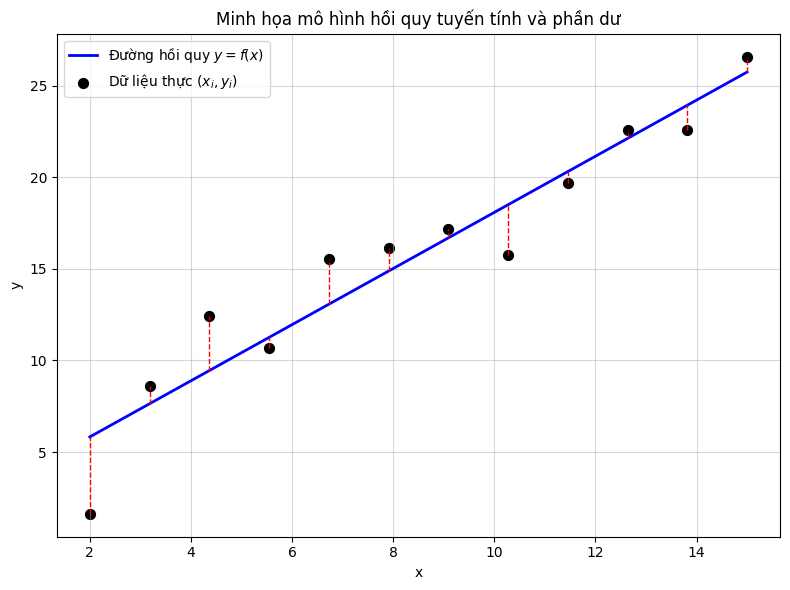

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sinh dữ liệu mẫu mới
np.random.seed(100)
N = 12
x_data = np.linspace(2, 15, N).reshape(-1, 1)
y_data = 1.5 * x_data.flatten() + 3 + np.random.normal(0, 2.5, N)

# Huấn luyện mô hình hồi quy tuyến tính
lr_model = LinearRegression()
lr_model.fit(x_data, y_data)
y_fitted = lr_model.predict(x_data)
errors = y_data - y_fitted

# Tạo đồ thị
plt.figure(figsize=(8, 6))

# Vẽ đường hồi quy
plt.plot(x_data, y_fitted, color='blue', label=r'Đường hồi quy $y = f(x)$', linewidth=2)

# Vẽ các điểm dữ liệu thực tế
plt.scatter(x_data, y_data, color='black', label=r'Dữ liệu thực $(x_i, y_i)$', s=50)

# Vẽ phần dư
for i in range(N):
    plt.vlines(x_data[i], min(y_data[i], y_fitted[i]), max(y_data[i], y_fitted[i]), 
               color='red', linestyle='--', linewidth=1)

# Thêm nhãn và tiêu đề
plt.title("Minh họa mô hình hồi quy tuyến tính và phần dư")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='best')
plt.grid(True, linestyle='-', alpha=0.5)
plt.tight_layout()

# Hiển thị đồ thị
plt.show()

Đường hồi quy được vẽ bằng màu xanh. Các đoạn thẳng đỏ thể hiện phần dư giữa dữ liệu thực và giá trị mô hình dự đoán.

Điều này phản ánh trực quan mục tiêu của phương pháp OLS: **tìm đường hồi quy sao cho tổng bình phương độ dài các đoạn thẳng đỏ là nhỏ nhất**.

---

#### **Bước 3: Tính nghiệm tối ưu (Closed-form Solution)**

Bài toán tối ưu:

$$
\boldsymbol{\beta} = \arg \min_{\boldsymbol{\beta} \in \mathbb{R}^{n+1}} \|\mathbf{y} - X \boldsymbol{\beta}\|^2
$$

Nghiệm đóng (giải tích):

$$
\boldsymbol{\beta} = (X^T X)^{-1} X^T \mathbf{y}
$$

#### **Bước 4: Dự đoán giá trị đầu ra**

Sau khi tìm được nghiệm $ \boldsymbol{\beta} $, ta có thể dự đoán giá trị đầu ra:

$$
\hat{\mathbf{y}} = X \boldsymbol{\beta}
$$

#### **Bước 5: Đánh giá mô hình**
Có nhiều thông số giúp đánh giá mô hình, tuy nhiên ở đây tôi đề cập đến **sai số bình phương trung bình (MSE):**
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})^2
$$

#### Mã nguồn

In [33]:
# Hàm tính tích hai ma trận
def multiply_matrix(A_list, B_list):
    result_list = [[0 for _ in range(len(B_list[0]))] for _ in range(len(A_list))]

    m_row_A = len(A_list)
    n_col_B = len(B_list[0])
    for i_row in range(m_row_A):
        for i_col in range(n_col_B):
            total = 0
            for i,a in enumerate(A_list[i_row]): 
                total += a*B_list[i][i_col]
            result_list[i_row][i_col] = total

    return result_list
    
# Hàm tìm ma trận khả nghịch và tìm ma trận nghịch đảo
def find_inverse(matrix):
    size = len(matrix)

    # Kiểm tra ma trận đầu vào có vuông không
    if not all(len(row) == size for row in matrix):
        raise ValueError("Đầu vào phải là ma trận vuông")

    # Tạo ma trận mở rộng [matrix | I]
    augmented = []
    for row_index in range(size):
        row = []
        
        for col_index in range(size):
            row.append(matrix[row_index][col_index])
            
        for col_index in range(size):
            if row_index == col_index:
                row.append(1)
            else:
                row.append(0)
        augmented.append(row)

    # Khử Gauss–Jordan
    for pivot_index in range(size):
        # Nếu phần tử chéo chính bằng 0 thì ta đổi dòng
        if augmented[pivot_index][pivot_index] == 0:
            found = False
            for swap_row in range(pivot_index + 1, size):
                if augmented[swap_row][pivot_index] != 0:
                    augmented[pivot_index], augmented[swap_row] = augmented[swap_row], augmented[pivot_index]
                    found = True
                    break
            if not found:
                print("Ma trận không khả nghịch")
                return  # Dừng hàm tại đây

        # Biến phần tử chéo chính thành 1
        pivot_value = augmented[pivot_index][pivot_index]
        for col in range(2 * size):
            augmented[pivot_index][col] /= pivot_value

        # Khử các phần tử khác trong cột để tạo giá trị 0
        for row_index in range(size):
            if row_index != pivot_index:
                factor = augmented[row_index][pivot_index]
                for col in range(2 * size):
                    augmented[row_index][col] -= factor * augmented[pivot_index][col]

    # Phần bên phải của ma trận lúc này là ma trận nghịch đảo cần tìm
    inverse = []
    for row_index in range(size):
        inverse_row = []
        for col_index in range(size, 2 * size):
            inverse_row.append(augmented[row_index][col_index])
        inverse.append(inverse_row)

    return inverse
    
# Hàm tìm ma trận chuyển vị
def transpose_matrix(A):
    num_rows = len(A)
    num_cols = len(A[0])

    transposed_A = []
    for col in range(num_cols):
        new_row = []
        for row in range(num_rows):
            new_row.append(A[row][col])
        transposed_A.append(new_row)

    return transposed_A
    
# Hàm thêm cột 1 vào ma trận để tính toán hệ số chặn
def add_intercept_column_to_A(A):
    num_rows = len(A)
    result = []

    for row in A:
        new_row = [1] + row  # Thêm số 1 vào đầu mỗi hàng
        result.append(new_row)

    return result
    
# Hàm chia dữ liệu thành k phần cho cross-validation
def split_k_folds(X, y, k):
    # Gộp X và y lại để tiện trộn đồng thời
    data = list(zip(X, y))
    n = len(data)

    # Xáo trộn Fisher-Yates
    for i in range(n - 1, 0, -1):
        j = i  
        data[i], data[j] = data[j], data[i]

    # Chia kích thước các fold gần bằng nhau
    fold_sizes = [n // k] * k
    for i in range(n % k):
        fold_sizes[i] += 1

    folds = []
    current = 0

    for fold_size in fold_sizes:
        test_data = data[current:current + fold_size]
        train_data = data[:current] + data[current + fold_size:]

        # Tách lại X và y cho train/test
        X_train = [x for x, _ in train_data]
        y_train = [y for _, y in train_data]
        X_test = [x for x, _ in test_data]
        y_test = [y for _, y in test_data]

        folds.append((X_train, y_train, X_test, y_test))
        current += fold_size

    return folds


# Hàm tính MSE 
def calculate_mean_squared_error(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("Hai danh sách phải có cùng độ dài.")

    n = len(y_true)
    total_error = 0

    for i in range(n):
        error = y_true[i] - y_pred[i]
        total_error += error ** 2

    mse = total_error / n
    return mse



Fold 1
Hệ số hồi quy: β = [β0 = 32.795833, β1 = 0.001771, β2 = -0.987470, β3 = -0.174605, β4 = 0.034928, β5 = -1.786016, β6 = 0.001208, β7 = -0.002635, β8 = -28.597526, β9 = -0.494665, β10 = 1.205926, β11 = 0.285104]
Fold 1 có MSE = 0.446089
----------------------------------------

Fold 2
Hệ số hồi quy: β = [β0 = 72.116333, β1 = 0.066062, β2 = -1.133920, β3 = -0.242302, β4 = 0.031862, β5 = -1.460854, β6 = 0.004500, β7 = -0.003790, β8 = -68.737798, β9 = -0.167548, β10 = 0.633945, β11 = 0.234353]
Fold 2 có MSE = 0.453519
----------------------------------------

Fold 3
Hệ số hồi quy: β = [β0 = 52.675411, β1 = 0.096569, β2 = -1.099479, β3 = -0.461843, β4 = 0.062199, β5 = -1.226232, β6 = 0.002434, β7 = -0.003249, β8 = -50.218564, β9 = -0.091072, β10 = 0.665542, β11 = 0.276427]
Fold 3 có MSE = 0.467885
----------------------------------------

Fold 4
Hệ số hồi quy: β = [β0 = 24.657006, β1 = 0.031146, β2 = -1.076492, β3 = -0.311006, β4 = 0.020048, β5 = -1.858769, β6 = 0.004023, β7 = -0.004

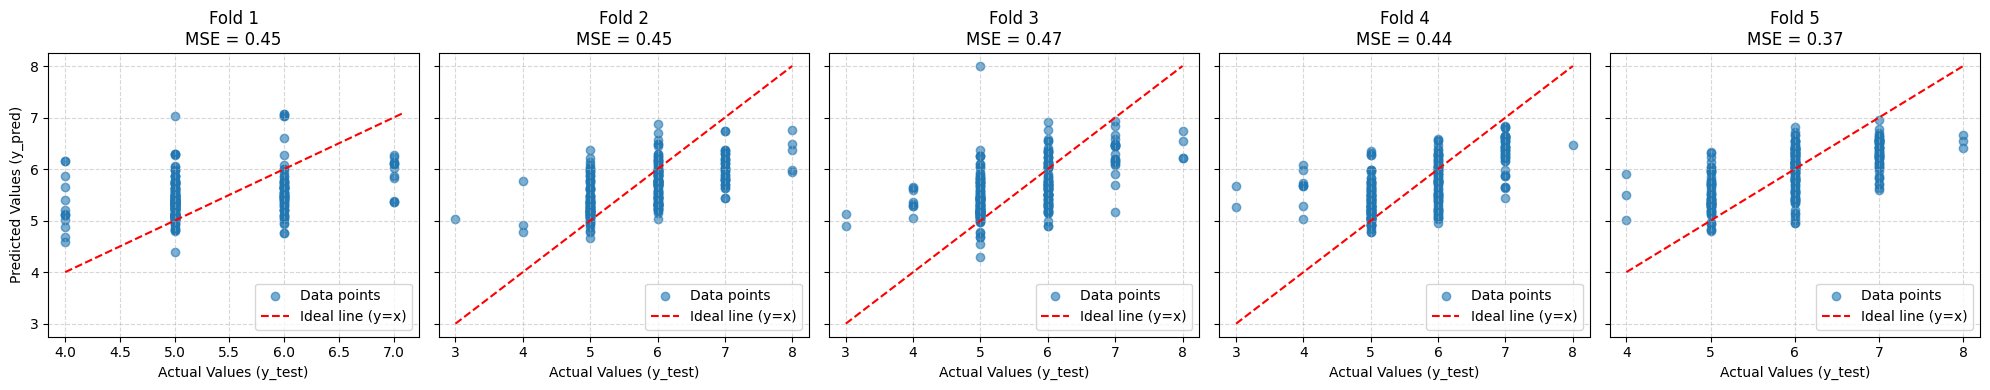

In [34]:
import matplotlib.pyplot as plt #Dùng cho việc trực quan hóa

# Hàm trực quan hóa kết quả
def visualize_results(fold_results):
    num_folds = len(fold_results)
    fig, axes = plt.subplots(1, num_folds, figsize=(4 * num_folds, 4), sharey=True)

    for idx, res in enumerate(fold_results):
        ax = axes[idx]
        ax.scatter(res["y_test"], res["y_pred"], alpha=0.6, label="Data points")
        min_val = min(min(res["y_test"]), min(res["y_pred"]))
        max_val = max(max(res["y_test"]), max(res["y_pred"]))
        ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Ideal line (y=x)")
        ax.set_xlabel("Actual Values (y_test)")
        if idx == 0:
            ax.set_ylabel("Predicted Values (y_pred)")
        ax.set_title(f"Fold {res['fold']}\nMSE = {res['mse']:.2f}")
        ax.grid(True, linestyle="--", alpha=0.5)
        ax.legend(loc='lower right', frameon=True)

    plt.tight_layout()
    plt.show()

# Hàm huấn luyện mô hình hồi quy tuyến tính và đánh giá bằng k-fold cross-validation
def linear_regression(A, y, k):
    # Thêm cột 1 vào ma trận đặc trưng để tính hệ số chặn
    A = add_intercept_column_to_A(A)

    # Chia dữ liệu thành k folds
    folds = split_k_folds(A, y, k)

    mse_list = []

    best_beta = None
    best_mse = float("inf")
    best_model = -1

    fold_results = []  # Danh sách lưu kết quả để trực quan hóa

    for fold_index, (A_train, y_train, A_test, y_test) in enumerate(folds):
        # Tính beta = (A^T * A)^(-1) * A^T * y
        A_train_T = transpose_matrix(A_train)
        ATA = multiply_matrix(A_train_T, A_train)
        ATy = multiply_matrix(A_train_T, [[val] for val in y_train]) 

        ATA_inv = find_inverse(ATA)
        if ATA_inv is None:
            print(f"Fold {fold_index + 1}: Ma trận không khả nghịch, bỏ qua fold này.")
            continue  # Bỏ qua fold không khả nghịch

        beta_matrix = multiply_matrix(ATA_inv, ATy)  

        print(f"\nFold {fold_index + 1}")
        beta_str = ", ".join([f"β{i} = {b[0]:.6f}" for i, b in enumerate(beta_matrix)])
        print(f"Hệ số hồi quy: β = [{beta_str}]")


        # Dự đoán y_pred = A_test * beta
        y_pred_matrix = multiply_matrix(A_test, beta_matrix)  
        y_pred = [row[0] for row in y_pred_matrix]  

        mse = calculate_mean_squared_error(y_test, y_pred)
        print(f"Fold {fold_index + 1} có MSE = {mse:.6f}")
        print("-" * 40)
        mse_list.append(mse)

        # Lưu kết quả để visualize
        fold_results.append({
            "fold": fold_index + 1,
            "mse": mse,
            "y_test": y_test,
            "y_pred": y_pred
        })

        # Tìm ra mô hình tốt nhất
        if mse < best_mse:
            best_mse = mse
            best_beta = [row[0] for row in beta_matrix]
            best_model = fold_index + 1

    # In mô hình tốt nhất
    if best_beta is not None:
        print(f"\nMô hình tốt nhất là ở Fold {best_model} với MSE = {best_mse:.6f}")
        beta_str = ", ".join([f"β{i} = {b:.6f}" for i, b in enumerate(best_beta)])
        print(f"Hệ số beta tốt nhất: ({beta_str})")

    
    # Trả về kết quả ở từng fold và mô hình tốt nhất
    return fold_results, best_model

# Hàm đọc dữ liệu từ file CSV
def read_wine_csv(filename):
    with open(filename, "r") as f:
        lines = f.readlines()

    # Bỏ dòng tiêu đề
    header = lines[0].strip().split(",")
    data = []

    for line in lines[1:]:
        parts = line.strip().split(",")
        # Chuyển tất cả thành float
        row = [float(value) for value in parts]
        data.append(row)

    y = [row[0] for row in data]       # Nhãn (chất lượng)
    A = [row[1:] for row in data]      # 11 đặc trưng

    return A, y

# Thực hiện hồi quy tuyến tính trên dữ liệu đề bài cung cấp

# Đọc dữ liệu từ file CSV
A, y = read_wine_csv("wine.csv")

# Chia dữ liệu thành k fold và huấn luyện mô hình hồi quy tuyến tính
fold_results, best_model = linear_regression(A, y, k=5)

# Trực quan hóa kết quả
visualize_results(fold_results)

Biểu đồ trên thể hiện **sự tương quan giữa giá trị dự đoán (`predict`) và giá trị thực tế (`test`)**.  
Mỗi điểm màu xanh đại diện cho một cặp điểm $(y_{\text{test}}, y_{\text{predict}})$, trong khi **đường màu đỏ** (đường thẳng của hàm số $y = x$) biểu diễn **trường hợp lý tưởng** — tức là khi dự đoán hoàn toàn chính xác.

Dựa vào các biểu đồ trên, ta thấy rằng **Fold 5** là mô hình có các điểm dữ liệu **tập trung gần đường chéo nhất**, nghĩa là sai số giữa dự đoán và thực tế là nhỏ nhất trong các fold.

**Kết luận:**  
Mô hình đánh giá chất lượng rượu xây dựng theo yêu cầu a:

$$
\begin{aligned}
y =\ &36.681935 +\ 0.043252x_1\ -\ 1.016627x_2\ -\ 0.203611x_3\ +\ 0.027407x_4 \\
     &-\ 1.447932x_5\ +\ 0.004248x_6\ -\ 0.004393x_7\ -\ 33.550069x_8 \\
     &-\ 0.136899x_9\ +\ 0.726958x_{10}\ +\ 0.270375x_{11}
\end{aligned}
$$



## Yêu cầu b

### Mô hình hồi quy tuyến tính được xây dựng sẽ có dạng
$$
y = \beta_0 + \beta_1 x_1 
$$

### Ý tưởng và cách tiếp cận:

Ta sẽ lần lượt xây dựng **11 mô hình hồi quy tuyến tính**, mỗi mô hình chỉ sử dụng **một đặc trưng đầu vào** trong số 11 đặc trưng được cung cấp. Quá trình huấn luyện và đánh giá từng mô hình sẽ được thực hiện bằng phương pháp **k-fold cross-validation**.

Cụ thể, với mỗi đặc trưng:
- Dữ liệu sẽ được chia thành *k* phần.
- Mỗi mô hình sẽ được huấn luyện *k* lần, mỗi lần sử dụng *k-1* phần để huấn luyện và 1 phần còn lại để kiểm tra.
- Từ đó ta thu được *k giá trị MSE* (Mean Squared Error) cho mỗi mô hình.

Sau đó:
- **MSE trung bình** của từng mô hình sẽ được tính để đánh giá tổng quát mức độ hiệu quả của từng đặc trưng.
- **Đặc trưng nào cho mô hình có MSE trung bình thấp nhất** sẽ được chọn là đặc trưng tốt nhất.

Sau khi chọn được đặc trưng đầu vào tốt nhất, ta sẽ giữ lại toàn bộ kết quả huấn luyện từ k-fold cross-validation tương ứng với đặc trưng này. Mô hình nào được huấn luyện từ đặc trưng này cho **kết quả MSE thấp nhất** sẽ là mô hình được chọn.

#### Mã nguồn

Đặc trưng x_1 có MSE trung bình: 0.676899
Đặc trưng x_2 có MSE trung bình: 0.577767
Đặc trưng x_3 có MSE trung bình: 0.645201
Đặc trưng x_4 có MSE trung bình: 0.682420
Đặc trưng x_5 có MSE trung bình: 0.671962
Đặc trưng x_6 có MSE trung bình: 0.679922
Đặc trưng x_7 có MSE trung bình: 0.641326
Đặc trưng x_8 có MSE trung bình: 0.686377
Đặc trưng x_9 có MSE trung bình: 0.677840
Đặc trưng x_10 có MSE trung bình: 0.681773
Đặc trưng x_11 có MSE trung bình: 0.495804


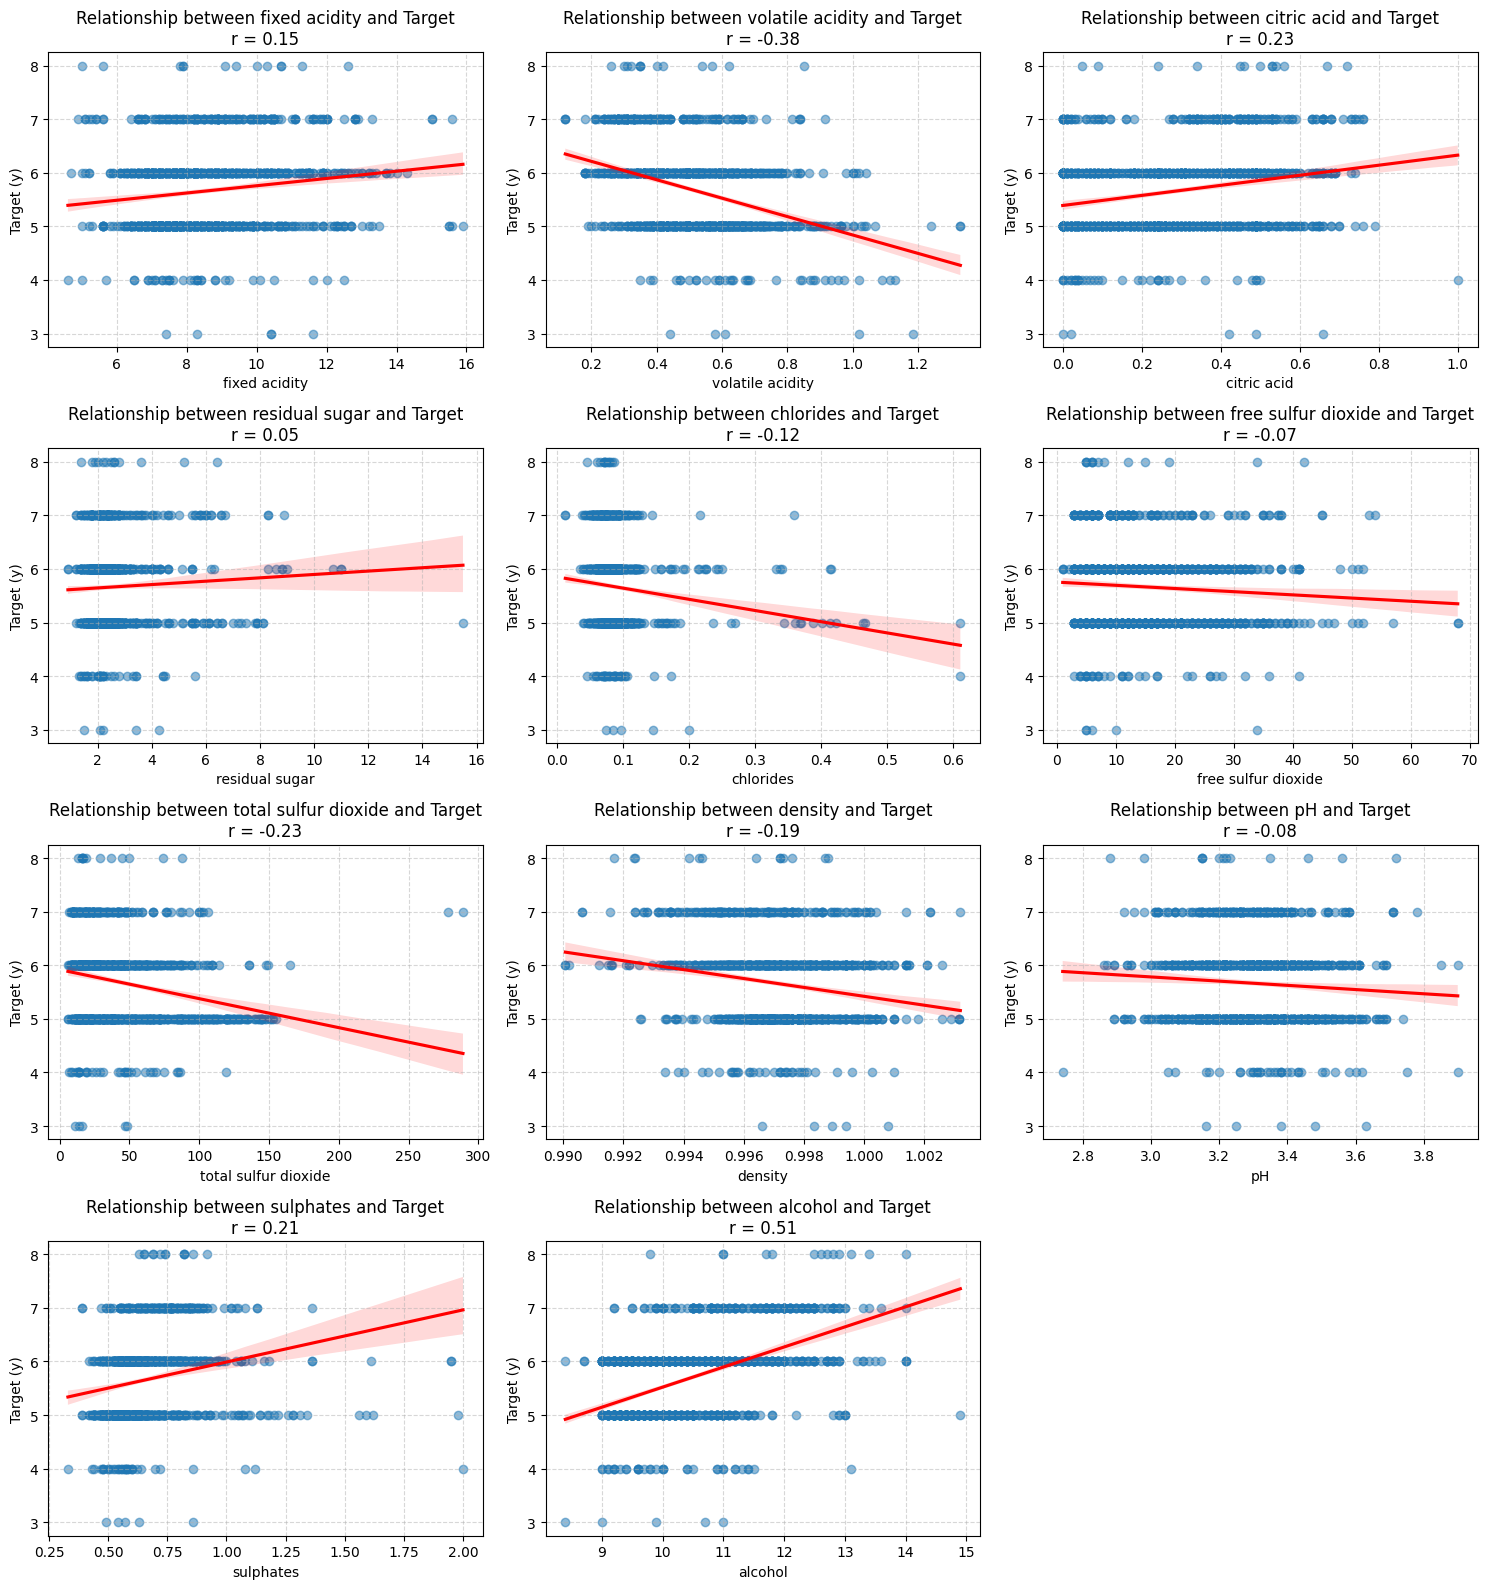


Đặc trưng tốt nhất là: alcohol (x_11)
Hệ số hồi quy cuối cùng: beta_0 = 1.82146923, beta_1 = 0.36828595


In [35]:
# Hàm hồi quy tuyến tính tối giản (in quá nhiều gây loãng thông tin)
# Hàm này không in ra hệ số hồi quy và MSE cho từng fold, chỉ in ra mô hình tốt nhất
def linear_regression_minimal(A, y, k):
    A = add_intercept_column_to_A(A)
    folds = split_k_folds(A, y, k)
    fold_results = []
    best_mse = float("inf")
    best_beta = None

    for fold_index, (A_train, y_train, A_test, y_test) in enumerate(folds):
        A_T = transpose_matrix(A_train)
        ATA = multiply_matrix(A_T, A_train)
        ATy = multiply_matrix(A_T, [[val] for val in y_train])
        ATA_inv = find_inverse(ATA)
        if ATA_inv is None:
            continue

        beta_matrix = multiply_matrix(ATA_inv, ATy)
        y_pred_matrix = multiply_matrix(A_test, beta_matrix)
        y_pred = [row[0] for row in y_pred_matrix]
        mse = calculate_mean_squared_error(y_test, y_pred)

        fold_results.append({
            "fold": fold_index + 1,
            "mse": mse,
            "y_test": y_test,
            "y_pred": y_pred,
            "beta": [b[0] for b in beta_matrix] 
        })

        if mse < best_mse:
            best_mse = mse
            best_beta = [b[0] for b in beta_matrix]

    return fold_results, best_beta

# Hàm trực quan hóa các đặc trưng so với nhãn
def visualize_features_vs_target(A, y, feature_names=None):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import pearsonr

    num_features = len(A[0])
    cols = 3
    rows = (num_features + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()

    for i in range(num_features):
        x = [row[i] for row in A]
        ax = axes[i]

        # Vẽ scatter plot + đường hồi quy tuyến tính
        sns.regplot(x=x, y=y, ax=ax, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

        # Tên đặc trưng
        feature_label = feature_names[i] if feature_names else f"x_{i+1}"

        # Tính hệ số tương quan Pearson
        try:
            r, _ = pearsonr(x, y)
            corr_text = f"r = {r:.2f}"
        except Exception:
            corr_text = "r = N/A"

        # Cập nhật tiêu đề và nhãn
        ax.set_title(f"Relationship between {feature_label} and Target\n{corr_text}")
        ax.set_xlabel(feature_label)
        ax.set_ylabel("Target (y)")
        ax.grid(True, linestyle='--', alpha=0.5)

    # Ẩn subplot thừa nếu có
    for j in range(num_features, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


# Hàm chọn đặc trưng tốt nhất và mô hình tốt nhất trong đặc trưng đó
def select_best_single_feature(A, y, k):
    num_features = len(A[0])
    best_mse_avg = float("inf")
    best_feature_index = -1
    best_feature_fold_results = []

    for i in range(num_features):
        # Trích cột thứ i làm đặc trưng duy nhất
        A_single = [[row[i]] for row in A]

        # Gọi linear_regression để lấy kết quả từng fold
        fold_results, _ = linear_regression_minimal(A_single, y, k)

        # Tính MSE trung bình
        avg_mse = sum([res["mse"] for res in fold_results]) / len(fold_results)
        print(f"Đặc trưng x_{i+1} có MSE trung bình: {avg_mse:.6f}")

        # Cập nhật đặc trưng tốt nhất
        if avg_mse < best_mse_avg:
            best_mse_avg = avg_mse
            best_feature_index = i
            best_feature_fold_results = fold_results

    # Chọn mô hình có MSE nhỏ nhất trong các fold của đặc trưng tốt nhất
    best_model_in_folds = min(best_feature_fold_results, key=lambda x: x["mse"])
    best_beta = best_model_in_folds.get("beta") 

    return best_feature_index, best_beta


# Đọc dữ liệu
A, y = read_wine_csv("wine.csv")

# Chọn đặc trưng tốt nhất và lấy luôn hệ số hồi quy tốt nhất
best_feature, final_beta = select_best_single_feature(A, y, k=5)

# Trực quan hóa các đặc trưng so với nhãn
feature_names = ["fixed acidity", "volatile acidity", "citric acid",
                 "residual sugar", "chlorides", "free sulfur dioxide",
                 "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
visualize_features_vs_target(A, y, feature_names)

# In kết quả cuối cùng
print(f"\nĐặc trưng tốt nhất là: {feature_names[best_feature]} (x_{best_feature+1})")
print(f"Hệ số hồi quy cuối cùng: beta_0 = {final_beta[0]:.8f}, beta_1 = {final_beta[1]:.8f}")

Dựa trên các biểu đồ đã trình bày, có thể nhận thấy rằng biến `alcohol` có **mối tương quan mạnh nhất** với biến mục tiêu **target**. Do đó, biến này được xem là đặc trưng quan trọng nhất trong việc dự đoán giá trị đầu ra. Từ kết quả cross-validation, mô hình sử dụng đặc trưng `alcohol` và cho giá trị sai số trung bình bình phương (MSE) nhỏ nhất được lựa chọn làm mô hình tối ưu.

**Kết luận:**  
Mô hình đánh giá chất lượng rượu xây dựng theo yêu cầu b:

$$
\begin{aligned}
y =\ &1.82146923 +\ 0.36828595x_1
\end{aligned}
$$

## Yêu cầu c

Quan sát và phân tích lại một lần nữa về 11 biểu đồ biểu diễn mối quan hệ tương quan giữa mỗi đặc trưng với Target, ta phân loại các đặc trưng như sau:
- Nhóm đặc trưng có tương quan mạnh: alcohol
- Nhóm đặc trưng có tương quan khá mạnh: volatile acidity
- Nhóm đặc trưng có tương quan trung bình: citric acid, sulphates, total sulfur dioxide, density
- Nhóm đặc trưng có tương quan yếu: chlorides, fixed acidity
- Nhóm đặc trưng có tương quan rất yếu: residual sugar, pH, free sulfur dioxide

Một số đặc trưng có tương quan rất yếu sẽ gây nhiễu, cùng với đó khi mô hình phụ thuộc vào quá nhiều đặc trưng sẽ dễ overfitting cũng như thời gian huấn luyện mô hình sẽ lâu hơn. Do đó, ở phần này ta sẽ "thử" xây dựng mô hình mà không có các đặc trưng thuộc nhóm có tương quan rất yếu.

Lúc này mô hình sẽ có dạng: 

$$
y = \beta_0 +  \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_{8} x_{8}
$$

Với:

| Biến       | $x_1$         | $x_2$            | $x_3$       | $x_4$    | $x_5$               | $x_6$   | $x_7$      | $x_8$         |
|------------|---------------|------------------|-------------|----------|---------------------|---------|------------|----------------|
| Đặc trưng | Alcohol        | Volatile Acidity | Citric Acid | Sulphates | Total Sulfur Dioxide | Density | Chlorides | Fixed Acidity |

**Trong đó:**

- $y$: Biến phản hồi (biến phụ thuộc)  
- $x_i$: Đặc trưng thứ $i$ với $1 \leq i \leq 8$
- $\beta_i$: Hệ số hồi quy (trọng số) của đặc trưng thứ $i$, với $1 \leq i \leq 8$  
- $\beta_0$: Hệ số chặn (giao điểm trục tung, hay còn gọi là y-intercept)

Ta sẽ tiến hành xây dựng mô hình này bằng phương pháp **OLS**


Fold 1
Hệ số hồi quy: β = [β0 = 34.350600, β1 = 0.285156, β2 = -1.005571, β3 = -0.127041, β4 = 1.155792, β5 = -0.001873, β6 = -31.995405, β7 = -1.513121, β8 = 0.034001]
Fold 1 có MSE = 0.432639
----------------------------------------

Fold 2
Hệ số hồi quy: β = [β0 = 61.649196, β1 = 0.249423, β2 = -1.187618, β3 = -0.262831, β4 = 0.619839, β5 = -0.002554, β6 = -58.889018, β7 = -1.319839, β8 = 0.073244]
Fold 2 có MSE = 0.456658
----------------------------------------

Fold 3
Hệ số hồi quy: β = [β0 = 18.820593, β1 = 0.315031, β2 = -1.135733, β3 = -0.457384, β4 = 0.614592, β5 = -0.002205, β6 = -16.676871, β7 = -1.134392, β8 = 0.085233]
Fold 3 có MSE = 0.460711
----------------------------------------

Fold 4
Hệ số hồi quy: β = [β0 = 29.332638, β1 = 0.271024, β2 = -1.121672, β3 = -0.337909, β4 = 0.782889, β5 = -0.003007, β6 = -26.640815, β7 = -1.583439, β8 = 0.061535]
Fold 4 có MSE = 0.442505
----------------------------------------

Fold 5
Hệ số hồi quy: β = [β0 = 25.319190, β1 = 0.28402

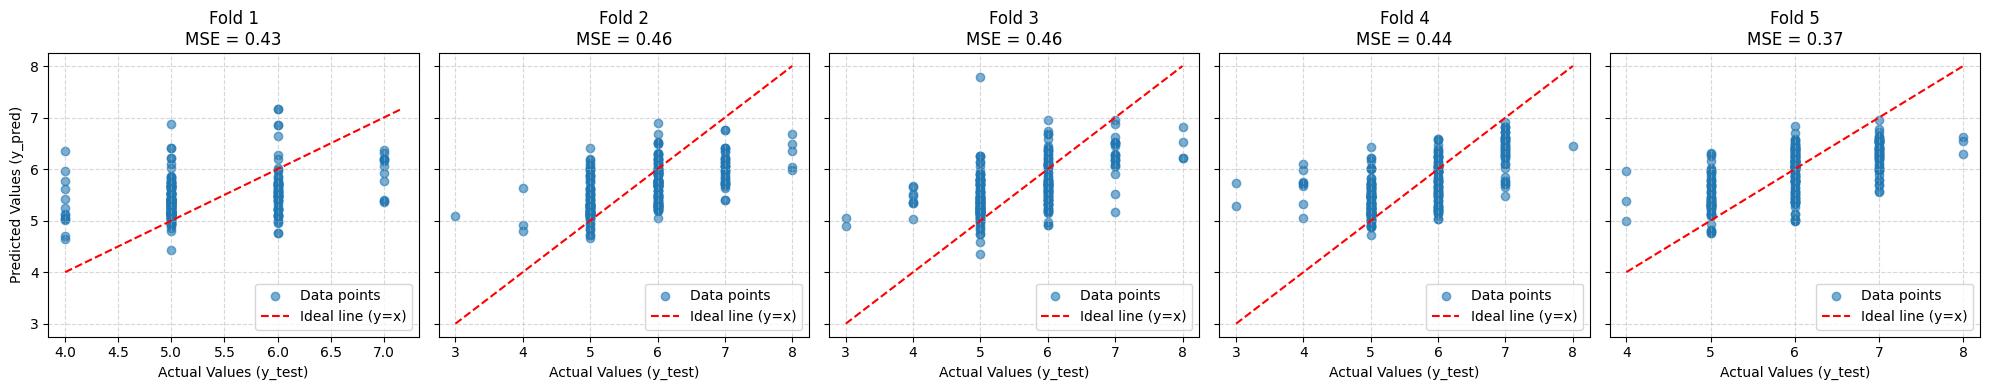

In [36]:
# Danh sách chỉ số đặc trưng giữ lại
selected_indices = [
    10,  # alcohol
    1,   # volatile acidity
    2,   # citric acid
    9,   # sulphates
    6,   # total sulfur dioxide
    7,   # density
    4,   # chlorides
    0    # fixed acidity
]

# Hàm lọc các đặc trưng được chọn từ ma trận A
def filter_selected_features(A, indices):
    return [[row[i] for i in indices] for row in A]

# Đọc toàn bộ dữ liệu, loại bỏ cột quality ở đây
A_full, y = read_wine_csv("wine.csv")  # Giả sử A_full không bao gồm cột quality

# Lọc chỉ giữ lại 8 đặc trưng đã chọn
A_selected = filter_selected_features(A_full, selected_indices)

# Chạy hồi quy tuyến tính
fold_results, best_model = linear_regression(A_selected, y, k=5)

# Trực quan hóa kết quả
visualize_results(fold_results)

Mô hình hồi quy ở fold 5 cho kết quả tốt nhất dựa trên chỉ số MSE và các biểu đồ mà ta đã trực quan hóa ở trên.
Ta nhận thấy rằng việc chênh lệch giữa MSE của mô hình mà ta vừa giảm chiều dữ liệu và mô hình hồi quy tuyến tính ban đầu (giữ cả 11 đặc trưng) là **không đáng kể**. 
Điều này cho thấy rằng việc giảm chiều dữ liệu đã không làm giảm độ chính xác của mô hình hồi quy tuyến tính ở một mức sai số cho phép. Điều này chứng tỏ rằng việc rút gọn mô hình là **hoàn toàn hợp lý**, vì nó đơn giản hóa quá trình huấn luyện và giải thích mô hình, trong khi vẫn duy trì hiệu suất dự đoán ở mức cao.

**Kết luận:**  Vậy, mô hình hồi quy tuyến tính tốt nhất mà ta xây dựng được ở câu c là:

$$
\begin{aligned}
y =\ &5.652035 +\ 0.309998x_1 -\ 0.189916x_2 -\ 0.046907x_3 +\ 0.126976x_4 \\
     &- 0.109781x_5 -\ 0.042597x_6 -\ 0.065245x_7 +\ 0.086697x_8
\end{aligned}
$$




## Mô tả các hàm

### 1. Hàm `multiply_matrix(A_list, B_list)`
- **Tác dụng**: Tính tích hai ma trận `A_list` và `B_list`.
- **Input**:
  - `A_list`: Ma trận thứ nhất.
  - `B_list`: Ma trận thứ hai.
- **Nguyên lý hoạt động**:
  - Tạo ma trận kết quả có kích thước bằng số hàng của `A` nhân với số cột của `B`, khởi tạo toàn bộ phần tử bằng 0.
  - Duyệt từng hàng của `A_list` và từng cột của `B_list`, tính tổng các tích phần tử tương ứng.
- **Output**: Ma trận kết quả là tích của hai ma trận đầu vào.

---

### 2. Hàm `find_inverse(matrix)`
- **Tác dụng**: Tìm ma trận nghịch đảo nếu ma trận đầu vào là khả nghịch.
- **Input**:
  - `matrix`: Ma trận vuông cần tìm nghịch đảo.
- **Nguyên lý hoạt động**:
  - Kiểm tra ma trận có phải vuông không.
  - Tạo ma trận mở rộng `[matrix | I]` với `I` là ma trận đơn vị.
  - Áp dụng khử Gauss–Jordan:
    - Biến các phần tử chéo chính thành 1.
    - Khử các phần tử khác về 0.
  - Nếu không thực hiện được phép khử (ví dụ: không tìm được dòng thay thế), hàm sẽ kết luận rằng ma trận không khả nghịch.
- **Output**: Ma trận nghịch đảo hoặc `None` nếu không khả nghịch.

---

### 3. Hàm `transpose_matrix(A)`
- **Tác dụng**: Trả về ma trận chuyển vị của `A`.
- **Input**:
  - `A`: Ma trận đầu vào.
- **Nguyên lý hoạt động**:
  - Duyệt từng cột và trích xuất các phần tử từ từng hàng tương ứng để tạo thành hàng mới.
- **Output**: Ma trận chuyển vị.

---

### 4. Hàm `add_intercept_column_to_A(A)`
- **Tác dụng**: Thêm một cột chứa toàn số 1 vào đầu ma trận `A`.
- **Input**:
  - `A`: Ma trận đầu vào.
- **Nguyên lý hoạt động**:
  - Duyệt từng hàng và thêm số 1 vào đầu mỗi hàng.
- **Output**: Ma trận mới có thêm cột 1 phía trước.

---

### 5. Hàm `split_k_folds(X, y, k)`
- **Tác dụng**: Chia dữ liệu thành `k` phần để phục vụ k-fold cross-validation.
- **Input**:
  - `X`: Danh sách đặc trưng.
  - `y`: Danh sách nhãn tương ứng.
  - `k`: Số lượng fold cần chia.
- **Nguyên lý hoạt động**:
  - Gộp `X` và `y` để tạo thành một tập hợp dữ liệu chung.
  - Sử dụng thuật toán xáo trộn (Fisher–Yates) để trộn dữ liệu.
  - Chia dữ liệu thành `k` phần gần bằng nhau.
  - Mỗi fold sẽ gồm 1 phần làm tập kiểm tra và phần còn lại là tập huấn luyện.
- **Output**: Danh sách các fold, mỗi fold là tuple gồm `(X_train, y_train, X_test, y_test)`.

---

### 6. Hàm `calculate_mean_squared_error(y_true, y_pred)`
- **Tác dụng**: Tính sai số bình phương trung bình (MSE) giữa giá trị thực tế và dự đoán.
- **Input**:
  - `y_true`: Danh sách các giá trị thực tế.
  - `y_pred`: Danh sách các giá trị dự đoán.
- **Nguyên lý hoạt động**:
  - Kiểm tra độ dài hai danh sách bằng nhau.
  - Tính tổng bình phương hiệu giữa từng cặp giá trị.
  - Chia tổng này cho số lượng phần tử để lấy trung bình.
- **Output**: Giá trị MSE (số thực).

---

### 7. Hàm `visualize_results(fold_results)`
- **Tác dụng**: Trực quan hóa kết quả dự đoán và thực tế của từng fold trong k-fold cross-validation.
- **Input**:
  - `fold_results`: Danh sách kết quả mỗi fold chứa các giá trị dự đoán, thực tế và MSE.
- **Nguyên lý hoạt động**:
  - Duyệt từng fold và vẽ biểu đồ scatter giữa `y_test` và `y_pred`.
  - Vẽ thêm đường `y = x` để so sánh với đường lý tưởng.
  - Mỗi subplot thể hiện một fold với tiêu đề là chỉ số fold và MSE tương ứng.
- **Output**: Hiển thị biểu đồ trực quan.

---

### 8. Hàm `linear_regression(A, y, k)`
- **Tác dụng**: Huấn luyện mô hình hồi quy tuyến tính và đánh giá bằng k-fold cross-validation.
- **Input**:
  - `A`: Ma trận đặc trưng đầu vào.
  - `y`: Danh sách nhãn đầu ra.
  - `k`: Số lượng fold dùng cho cross-validation.
- **Nguyên lý hoạt động**:
  - Thêm cột 1 vào `A` để tính hệ số chặn.
  - Chia dữ liệu thành `k` fold.
  - Với mỗi fold:
    - Tính beta theo công thức hồi quy tuyến tính:  
      `β = (A^T * A)^(-1) * A^T * y`.
    - Dự đoán `y_pred = A_test * β`.
    - Tính MSE và lưu kết quả để trực quan hóa.
    - Ghi nhận mô hình tốt nhất với MSE nhỏ nhất.
- **Output**: Trả về danh sách kết quả từng fold và chỉ số mô hình tốt nhất.

---

### 9. Hàm `read_wine_csv(filename)`
- **Tác dụng**: Đọc dữ liệu rượu từ file CSV và tách thành đặc trưng và nhãn.
- **Input**:
  - `filename`: Đường dẫn đến file CSV chứa dữ liệu rượu.
- **Nguyên lý hoạt động**:
  - Đọc toàn bộ nội dung file.
  - Bỏ dòng tiêu đề, chuyển các giá trị còn lại thành số thực.
  - Tách cột đầu tiên làm nhãn (`y`), các cột còn lại làm đặc trưng (`A`).
- **Output**: Trả về tuple `(A, y)` gồm đặc trưng và nhãn.

---

### 10. Hàm `linear_regression_minimal(A, y, k)`
- **Tác dụng**: Thực hiện hồi quy tuyến tính với k-fold cross-validation nhưng tối giản đầu ra, chỉ lưu lại mô hình tốt nhất.
- **Input**:
  - `A`: Ma trận đặc trưng.
  - `y`: Danh sách nhãn.
  - `k`: Số lượng fold.
- **Nguyên lý hoạt động**:
  - Tương tự hàm `linear_regression`, nhưng không in ra hệ số và MSE cho từng fold.
  - Chỉ lưu lại các kết quả cần thiết để chọn mô hình tốt nhất.
- **Output**: Trả về danh sách kết quả từng fold và hệ số hồi quy `beta` tốt nhất.

---

### 11. Hàm `visualize_features_vs_target(A, y, feature_names=None)`
- **Tác dụng**: Trực quan hóa mối quan hệ giữa từng đặc trưng và nhãn đầu ra.
- **Input**:
  - `A`: Ma trận đặc trưng.
  - `y`: Danh sách nhãn.
  - `feature_names`: Danh sách tên đặc trưng (tuỳ chọn).
- **Nguyên lý hoạt động**:
  - Vẽ biểu đồ scatter cho từng đặc trưng với đường hồi quy tuyến tính.
  - Tính và hiển thị hệ số tương quan Pearson giữa từng đặc trưng và nhãn.
  - Sắp xếp biểu đồ thành lưới có kích thước phù hợp.
- **Output**: Hiển thị tập hợp các biểu đồ trực quan.

---

### 12. Hàm `select_best_single_feature(A, y, k)`
- **Tác dụng**: Lựa chọn đặc trưng đơn tốt nhất dựa trên MSE trung bình trong k-fold cross-validation.
- **Input**:
  - `A`: Ma trận đặc trưng.
  - `y`: Danh sách nhãn.
  - `k`: Số lượng fold.
- **Nguyên lý hoạt động**:
  - Duyệt qua từng đặc trưng, trích riêng ra và thực hiện hồi quy tuyến tính.
  - Tính MSE trung bình trên các fold và chọn đặc trưng có MSE thấp nhất.
  - Ghi nhận hệ số hồi quy của fold có MSE tốt nhất trong đặc trưng đó.
- **Output**: Trả về chỉ số đặc trưng tốt nhất và hệ số hồi quy `beta` tương ứng.

---

### 13. Hàm `filter_selected_features(A, indices)`
- **Tác dụng**: Lọc và giữ lại các đặc trưng theo chỉ số đã chọn từ ma trận đầu vào `A`.
- **Input**:
  - `A`: Ma trận đặc trưng ban đầu (danh sách các danh sách).
  - `indices`: Danh sách các chỉ số đặc trưng cần giữ lại.
- **Nguyên lý hoạt động**:
  - Với mỗi dòng (mẫu dữ liệu), chỉ giữ lại các phần tử tương ứng với các chỉ số trong `indices`.
- **Output**: Trả về ma trận mới chỉ gồm các đặc trưng được chọn.
